In this notebook, we're going to talk about [`matplotlib`](https://matplotlib.org/) — a comprehensive library for creating static, animated, and interactive visualizations in Python. We will use this library throughout the course to visualize our datasets and the performance of the machine learning models we will eventually be building.

It should be noted that `pandas` has many built-in functions for generating plots directly from `DataFrames`, typically using `matplotlib` behind the scenes. While this can sometimes be more convenient than grabbing data yourself and then mantually writing `matplotlib` code to generate a figure, there are going to be many situations when you are going to want to plot data from `numpy` arrays or other data structures. Therefore, we're going to stick with `matplotlib` so that you have the tools you need to plot anything.

In [1]:
!pip install matplotlib
import matplotlib.pyplot as plt

# Important: Run this code cell each time you start a new session!

In [2]:
!pip install numpy
!pip install pandas
!pip install os
import numpy as np
import pandas as pd
import os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [3]:
!wget -nc https://archive.physionet.org/users/shared/challenge-2019/training_setA.zip
!unzip -n training_setA.zip

Streaming output truncated to the last 5000 lines.
  inflating: training/p015337.psv    
  inflating: training/p015338.psv    
  inflating: training/p015339.psv    
  inflating: training/p015340.psv    
  inflating: training/p015341.psv    
  inflating: training/p015342.psv    
  inflating: training/p015343.psv    
  inflating: training/p015344.psv    
  inflating: training/p015345.psv    
  inflating: training/p015346.psv    
  inflating: training/p015347.psv    
  inflating: training/p015348.psv    
  inflating: training/p015349.psv    
  inflating: training/p015350.psv    
  inflating: training/p015351.psv    
  inflating: training/p015352.psv    
  inflating: training/p015353.psv    
  inflating: training/p015354.psv    
  inflating: training/p015355.psv    
  inflating: training/p015356.psv    
  inflating: training/p015357.psv    
  inflating: training/p015358.psv    
  inflating: training/p015359.psv    
  inflating: training/p015360.psv    
  inflating: training/p015361.psv    

In [4]:
def load_single_file(file_path):
    df = pd.read_csv(file_path, sep="|")
    df['PatientID'] = file_path.split(os.sep)[-1][:-4]
    df['Hour'] = df.index
    keep_cols = ['PatientID', 'Age', 'Gender', 'SepsisLabel', 'Hour',
                 'HR', 'O2Sat', 'SBP', 'DBP', 'Resp']
    df = df[keep_cols]
    df.rename(columns={'Gender': 'Sex', 'SepsisLabel': 'HasSepsis'}, inplace=True)
    return df

def create_final_table():
    final_df = pd.DataFrame()
    patient_list = range(1, 11)
    patient_list = [f'p{str(s).zfill(6)}.psv' for s in patient_list]
    for f in patient_list:
        df = load_single_file(os.path.join("training", f))
        final_df = pd.concat([final_df, df])
    final_df.to_csv('sepsis.csv',index=False)
create_final_table()

# Bar Chart

Let's revisit the [2019 PhysioNet Challenge](https://physionet.org/content/challenge-2019/1.0.0/) dataset we used in the last session, but this time we will look at daata recorded across multiple hours.

In [5]:
df = pd.read_csv('sepsis.csv')
df

,PatientID,Age,Sex,HasSepsis,Hour,HR,O2Sat,SBP,DBP,Resp
0,p000001,83.14,0,0,0,NaN,NaN,NaN,NaN,NaN
1,p000001,83.14,0,0,1,97.0,95.0,98.0,NaN,19.0
2,p000001,83.14,0,0,2,89.0,99.0,122.0,NaN,22.0
3,p000001,83.14,0,0,3,90.0,95.0,NaN,NaN,30.0
4,p000001,83.14,0,0,4,103.0,88.5,122.0,NaN,24.5
...,...,...,...,...,...,...,...,...,...,...
580,p000010,76.71,0,0,18,82.0,96.0,109.0,50.0,20.0
581,p000010,76.71,0,0,19,79.0,94.0,97.0,49.0,21.0
582,p000010,76.71,0,0,20,79.0,90.0,117.0,54.0,19.0
583,p000010,76.71,0,0,21,84.0,91.0,124.0,59.0,23.0


Imagine that we wanted to figure out how many rows in the table are associated with each patient. One of the best ways of displaying this information is a ***bar chart***.

To make this graph, we will want to get two sets of data:
1. The independent variable, which is the ID of each patient
2. The dependent variable, which is the number of rows they have in the dataset

To get this data from a `Series`, we can use the handy `.value_counts()` method. The values in the output will be our dependent values, and the corresponding indices will be our independent values.

In [6]:
# Counts the number of times each unique patient name appears in the Series
num_samples = df['PatientID'].value_counts()
print(num_samples)

PatientID
p000009    258
p000001     54
p000003     48
p000005     48
p000007     45
p000008     40
p000004     29
p000002     23
p000010     23
p000006     17
Name: count, dtype: int64


We can plot this data using the `bar()` function in `matplotlib`. At minimum, we need to specify the independent variable and the dependent variable in that order. These arguments can be lists, `numpy` arrays, or `pandas` `Series`.

The two other commands we're using below are not strictly necessary, but we'll use them to make the graphs look more tidy in Jupyter.

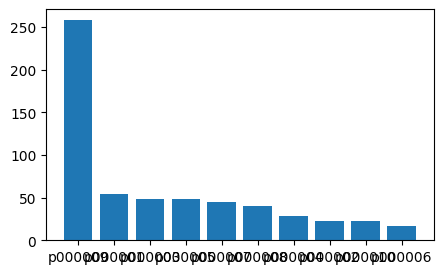

In [7]:
plt.figure(figsize=(5, 3)) # Reshapes the figure to 3x5 inches
plt.bar(num_samples.index, num_samples) # x-axis is Patient ID, y-axis is the number of samples
plt.show() # Shows the figure without any extra text in the console

This is a good starting point, but have a couple of issues with this graph:
1. It's hard to read the patient names along the x-axis.
2. If we were to send this image to someone, they won't know what this graph is showing unless we give them some additional background information.

It is good to get in the habit of making clearly labelled graphs where people know exactly what they are looking at.

Let's clean up this image a bit.

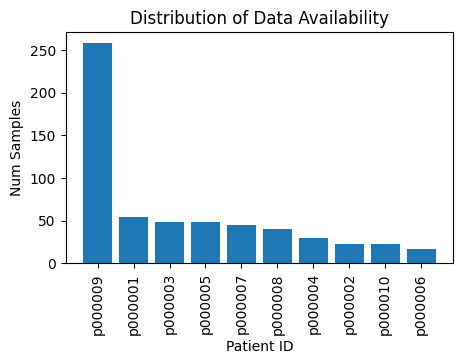

In [8]:
plt.figure(figsize=(5, 3))
plt.bar(num_samples.index, num_samples)
plt.xlabel('Patient ID') # Add a label to the x-axis
plt.ylabel('Num Samples') # Add a label to the y-axis
plt.title('Distribution of Data Availability') # Add a title
plt.xticks(rotation = 90) # We're rotating the tick marks so that they don't overlap
plt.show()

# Box Plot

Now let's make this a bit more complicated. Rather than trying to plot a single number for each patient, let's look at the distribution of heart rates for each patient in our dataset. In other words, we want a ***boxplot*** (i.e., a box-and-whiskers plot) showing the heart rate data of each patient.

Before we generate this plot, let's go on a brief tangent to cover two ways of manually calculating summary statistics for each patient's heart rate data from our `DataFrame`. The first way will be manual, while the second will take full advantage of `pandas`.

The manual approach will involve the following steps:
1. Initialize data structures where we will accumulate our results.
2. Get all the patient IDs
3. For each patient ID, grab all of the corresponding rows in the `DataFrame`
4. Calculate the mean and standard deviation of the heart rate values
5. Add the results to our accumulators

In [9]:
# Create a place to store this data
hr_distributions = {}

# Iterate through unique PatientIDs
for patient_id in df['PatientID'].unique():
    patient_df = df[df['PatientID'] == patient_id]
    patient_hr_df = patient_df['HR']
    hr_distributions[patient_id] = (patient_hr_df.mean(), patient_hr_df.std())

hr_distributions

{'p000001': (101.57142857142857, 9.594377693906642),
 'p000002': (60.95454545454545, 8.144394933398603),
 'p000003': (79.61111111111111, 6.714036254614866),
 'p000004': (102.44444444444444, 6.337212037659495),
 'p000005': (73.91666666666667, 7.586696976582942),
 'p000006': (100.0, 7.402702209328699),
 'p000007': (120.36363636363636, 10.980089610959167),
 'p000008': (76.34210526315789, 6.226691958446071),
 'p000009': (112.6470588235294, 12.857602610886634),
 'p000010': (77.04347826086956, 5.708671719964645)}

The fancy approach will utilize a `pandas` method called `.groupby()`. This method separates a `DataFrame` into a collection of sub-`DataFrames` according to a specific attribute. The output of this method is a special object that is not printable on its own, but we can easily see its contents using a `for` loop. Let's see what this looks like when we group our data by `PatientID`:

In [10]:
# Separate the DataFrame into separate groups according to PatientID
groupby_patient = df.groupby(by=['PatientID'])

# Show the first two entries of each group
for patient, frame in groupby_patient:
    print(patient)
    print(frame.iloc[:2])

('p000001',)
  PatientID    Age  Sex  HasSepsis  Hour    HR  O2Sat   SBP  DBP  Resp
0   p000001  83.14    0          0     0   NaN    NaN   NaN  NaN   NaN
1   p000001  83.14    0          0     1  97.0   95.0  98.0  NaN  19.0
('p000002',)
   PatientID    Age  Sex  HasSepsis  Hour    HR  O2Sat    SBP   DBP  Resp
54   p000002  75.91    0          0     0   NaN    NaN    NaN   NaN   NaN
55   p000002  75.91    0          0     1  61.0   99.0  124.0  43.0  17.5
('p000003',)
   PatientID    Age  Sex  HasSepsis  Hour    HR  O2Sat    SBP  DBP  Resp
77   p000003  45.82    0          0     0   NaN    NaN    NaN  NaN   NaN
78   p000003  45.82    0          0     1  87.0   96.0  131.0  NaN  29.0
('p000004',)
    PatientID    Age  Sex  HasSepsis  Hour     HR  O2Sat    SBP   DBP  Resp
125   p000004  65.71    0          0     0    NaN    NaN    NaN   NaN   NaN
126   p000004  65.71    0          0     1  103.5   97.0  107.5  52.0  18.0
('p000005',)
    PatientID    Age  Sex  HasSepsis  Hour    HR  O2S

This powerful method essentially groups all the data for us while keeping everything in `pandas` data structures. Here is all we need to do to get the data we need:

In [11]:
groupby_patient = df.groupby(by=['PatientID'])
hr_means = groupby_patient['HR'].mean()
hr_stds = groupby_patient['HR'].std()
hr_distributions = pd.concat([hr_means.rename('Mean'), hr_stds.rename('Std')], axis=1)
hr_distributions

,Mean,Std
PatientID,,
p000001,101.571429,9.594378
p000002,60.954545,8.144395
p000003,79.611111,6.714036
p000004,102.444444,6.337212
p000005,73.916667,7.586697
p000006,100.000000,7.402702
p000007,120.363636,10.980090
p000008,76.342105,6.226692
p000009,112.647059,12.857603


While you can manually plot bars and error bars with this information, there is a convenient `boxplot()` we can use to calculate and show the data distribution for us.

To make this graph, we will want to get two sets of data:
1. The independent variable, which is the ID of each patient
2. The dependent variable, which is the corresponding list of heart rate measurements for each patient

Recall that some of the entries of our `DataFrame` are empty. When we were calculating the mean and standard deviation earlier, `pandas` was good about ignoring `np.nan` values and only performing calculations on real values. `matplotlib` doesn't do this, so we will need to remove those values ourselves using a handy method called `.dropna()`.

In [12]:
# Get all of the heart rate data associated with each patient
# while removing NaN values
patient_ids = []
hr_measurements = []
for patient, frame in df.groupby(by=['PatientID']):
    real_hr_data = frame['HR'].dropna()
    patient_ids.append(patient)
    hr_measurements.append(real_hr_data)
    print(patient)
    print(real_hr_data[:5])

('p000001',)
1     97.0
2     89.0
3     90.0
4    103.0
5    110.0
Name: HR, dtype: float64
('p000002',)
55    61.0
56    64.0
57    56.0
58    66.0
59    94.0
Name: HR, dtype: float64
('p000003',)
78    87.0
79    93.0
80    90.0
81    89.0
82    84.0
Name: HR, dtype: float64
('p000004',)
126    103.5
127    108.0
128    107.5
129    113.0
130    107.0
Name: HR, dtype: float64
('p000005',)
154    84.0
155    80.0
156    74.0
157    73.0
158    71.0
Name: HR, dtype: float64
('p000006',)
202    109.0
203    111.0
204    107.0
205    106.0
206    103.0
Name: HR, dtype: float64
('p000007',)
220    155.5
221    146.0
222    154.0
223    122.0
224    124.0
Name: HR, dtype: float64
('p000008',)
265    73.0
266    73.0
267    80.0
268    77.0
269    75.0
Name: HR, dtype: float64
('p000009',)
305    117.0
310    120.0
311    109.5
312    102.5
313     98.0
Name: HR, dtype: float64
('p000010',)
562    82.0
563    81.0
564    80.0
565    63.0
566    70.0
Name: HR, dtype: float64


`boxplot()` is different from other graphing functions in `matplotlib` because it only takes in a single input: a list of lists that will be used to generate the distributions. Let's see what happens whene we use it.

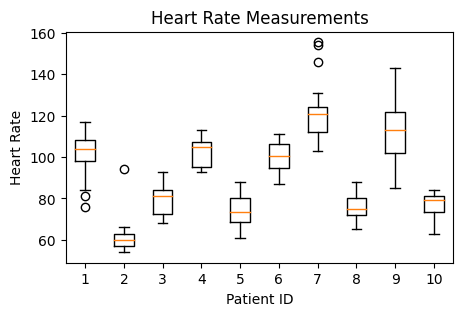

In [13]:
# Plot the data
plt.figure(figsize=(5, 3))
plt.boxplot(hr_measurements)
plt.xlabel('Patient ID')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Measurements')
plt.show()

The default tick marks along the bottom are the numbers 1...N, where N is the number of distributions we want to show. We can give these tick marks more meaningful names as follows:

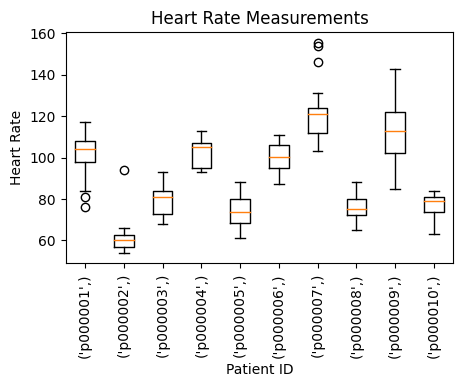

In [14]:
# Generate a numeric sequence corresponding to the original tick marks
old_ticks = np.arange(len(patient_ids))+1

# Plot the data
plt.figure(figsize=(5, 3))
plt.boxplot(hr_measurements)
plt.xlabel('Patient ID')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Measurements')
plt.xticks(ticks=old_ticks, labels=patient_ids, rotation=90)
plt.show()

# Line Graph

Finally, let's imagine that we wanted to create a ***line graph*** showing the changes in a patient's heart rate over time. To make this graph, we will want to get two sets of data:
1. The independent variable, which is the timestamp of each measurement
2. The dependent variable, which is the heart rate measurement at each timestamp.


In [16]:
# Get the timestamps and measurements of the first patient's heart rate data
p1_data = df[df['PatientID'] == 'p000001']
p1_hr = p1_data['HR']
p1_hour = p1_data['Hour']

We can call the `plot()` function to generate a line graph of this data. Similar to what we was required for the `bar()` function, we need to at least specify the independent and dependent values in that order.

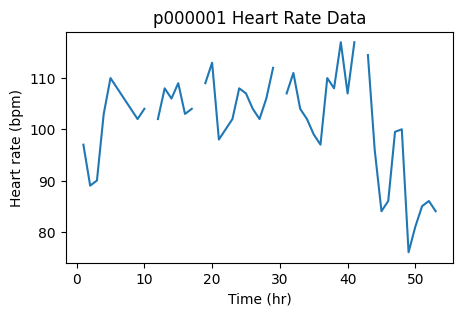

In [17]:
plt.figure(figsize=(5, 3))
plt.plot(p1_hour, p1_hr)
plt.title('p000001 Heart Rate Data')
plt.xlabel('Time (hr)')
plt.ylabel('Heart rate (bpm)')
plt.show()

Notice that this graph has gaps. This is because the heart rate value at that time was `np.nan`, and `matplotlib` ignores these values when generating plots.

Now let's say that we wanted to overlay the heart rate data from another patient on top of the graph. Let's start by grabbing that data.

In [18]:
# Get the second patient's data
p2_data = df[df['PatientID'] == 'p000002']
p2_hr = p2_data['HR']
p2_hour = p2_data['Hour']

And now let's add that data to our graph. We can do that by calling `plot()` a second time.

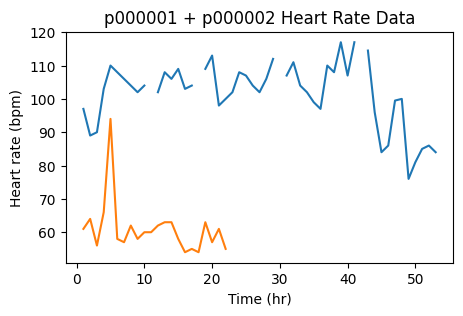

In [19]:
plt.figure(figsize=(5, 3))
plt.plot(p1_hour, p1_hr)
plt.plot(p2_hour, p2_hr) # Plot the new data
plt.title('p000001 + p000002 Heart Rate Data')
plt.xlabel('Time (hr)')
plt.ylabel('Heart rate (bpm)')
plt.show()

So now we have two lines, and `matplotlib` automatically drew the new line with a different color. But how are other people going to know which line belongs to which patient? Let's add an informative legend.

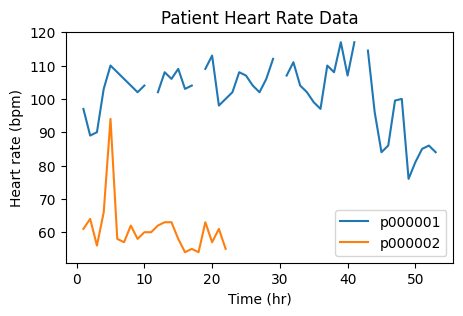

In [20]:
plt.figure(figsize=(5, 3))
plt.plot(p1_hour, p1_hr, label='p000001') # Add a label to the first patient's data
plt.plot(p2_hour, p2_hr, label='p000002') # Add a label to the second patient's data
plt.title('Patient Heart Rate Data')
plt.xlabel('Time (hr)')
plt.ylabel('Heart rate (bpm)')
plt.legend() # Generate the legend
plt.show()

# Aesthetics

With all of the graphs we generated, there are hundreds of parameters we can leverage to tweak the appearance of the graph. `matplotlib` can change, among other visual attributes:
* Line color
* Line style (e.g., solid, dashed)
* Line thickness
* Points or no points
* Size of points

We don't have time to go over all of these features, but here is a quick example to show what is possible.

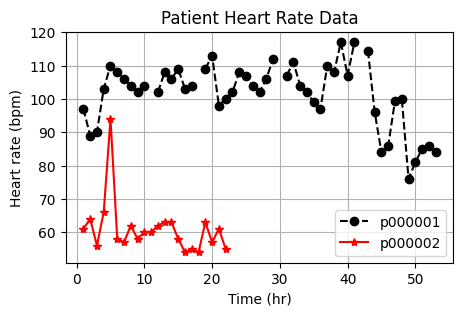

In [21]:
plt.figure(figsize=(5, 3))
plt.plot(p1_hour, p1_hr, 'k--o', label='p000001') # k = black, -- = dashed line, o = circles for points
plt.plot(p2_hour, p2_hr, 'r-*', label='p000002') # r = red, - = solid line, * = stars for points
plt.grid() # Add grid lines that match the tick marks along the axes
plt.title('Patient Heart Rate Data')
plt.xlabel('Time (hr)')
plt.ylabel('Heart rate (bpm)')
plt.legend()
plt.show()

# Subplots

You might find it helpful to put multiple plots side-by-side. In these situations, you can use the function `plt.subplot()`, which helps you arrange your plots in a grid. This function takes three arguments (1) the number of rows you want to set up in your grid, (2) the number of columns you want to set up in your grid, (3) the position ID of the current graph that you want to plot. For example, this code cell generates a 2 $\times$ 3 grid of empty plots:

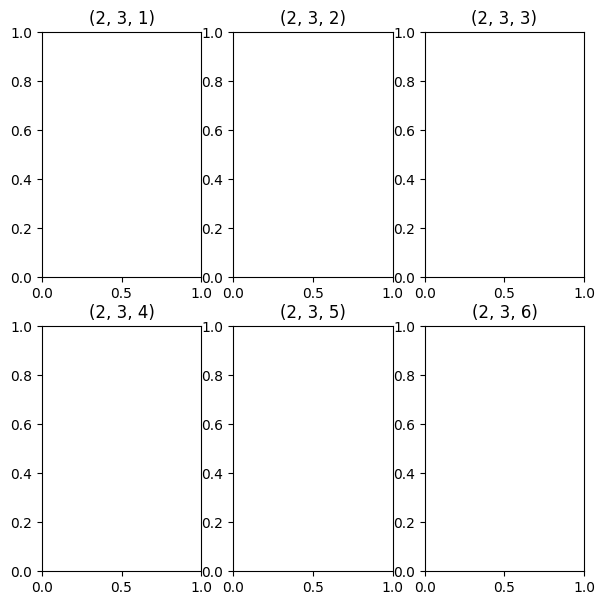

In [22]:
plt.figure(figsize=(7, 7))
plt.subplot(2, 3, 1)
plt.title('(2, 3, 1)')
plt.subplot(2, 3, 2)
plt.title('(2, 3, 2)')
plt.subplot(2, 3, 3)
plt.title('(2, 3, 3)')
plt.subplot(2, 3, 4)
plt.title('(2, 3, 4)')
plt.subplot(2, 3, 5)
plt.title('(2, 3, 5)')
plt.subplot(2, 3, 6)
plt.title('(2, 3, 6)')
plt.show()

You can actually get quite creative with subplots by mixing your grid specifications. In this example here, we split up the top row into two plots, but we pretend that the bottom row only has one spot so that the plot fills in both columns:

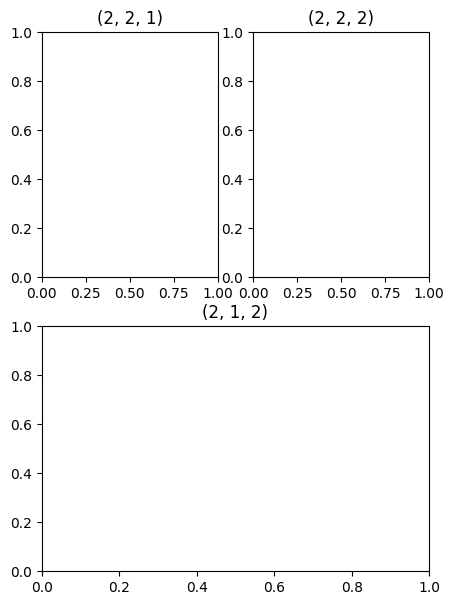

In [23]:
plt.figure(figsize=(5, 7))
plt.subplot(2, 2, 1)
plt.title('(2, 2, 1)')
plt.subplot(2, 2, 2)
plt.title('(2, 2, 2)')
plt.subplot(2, 1, 2)
plt.title('(2, 1, 2)')
plt.show()